In [1]:
import matplotlib.pyplot as plt    # to make figures
import xarray as xr                # to deal with arrays in an efficient way

import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

In [2]:
ERA5="ERA5_snapshot.nc"  #let's load some data.

#opening the netcdf with xarray
era = xr.open_dataset(ERA5); 

#But for plotting examples we will transfer the variables back to numpy arrays
lon=era.longitude; 
lat=era.latitude;

u=era['u10'].data; 
v=era['v10'].data;

sst=era['sst'].data-273.15;


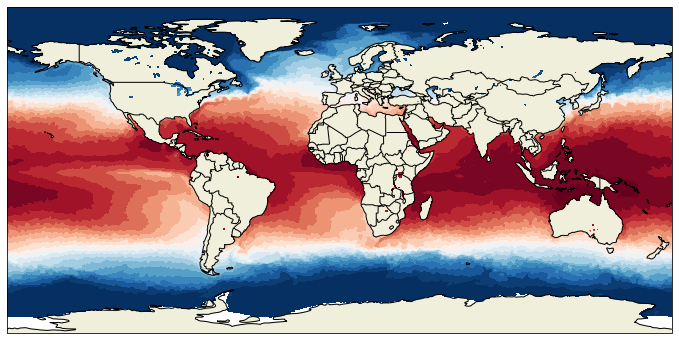

In [3]:
plt.figure(figsize=(12,6)); # this creates a figure of size (12,6) inches.
ax = plt.axes(projection=ccrs.PlateCarree()) #this specifies which projection to use
ax.contourf(lon,lat, sst, 
                  transform=ccrs.PlateCarree(),
                  levels=30,
                  cmap='RdBu_r',
                  vmin=0, vmax=30)

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)


/usr/local/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1841: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/usr/local/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1841: RuntimeWarning: invalid value encountered in subtract
  u, v = self.projection.transform_vectors(t, x, y, u, v)


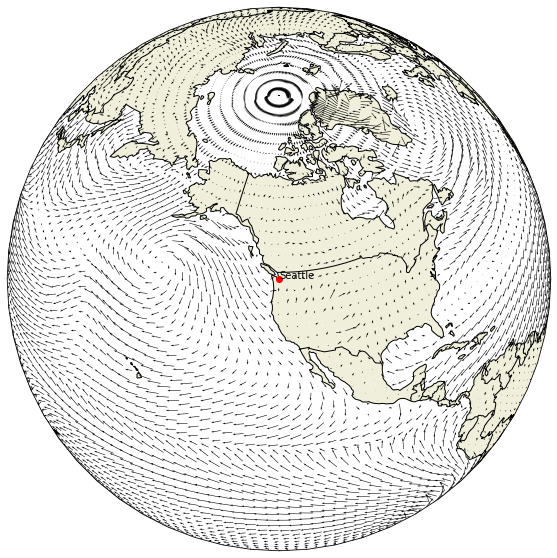

In [4]:
Lat_Seattle=47.6062; Lon_Seattle=360-122.3321;  


plt.figure(figsize=(10,10));
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=Lon_Seattle, 
                                           central_latitude=Lat_Seattle, 
                                           globe=None));


N=10; 
ax.quiver(lon[::N], lat[::N], u[::N,::N], v[::N,::N],
          transform=ccrs.PlateCarree(),
          width=0.001, 
          scale=300);

plt.title('');

plt.plot(Lon_Seattle,Lat_Seattle,      # add a red dot for Seattle location!
         marker='o',color='red',
         transform=ccrs.PlateCarree()); 

plt.text(Lon_Seattle,Lat_Seattle,      # add a text label
         'Seattle',
         transform=ccrs.PlateCarree());


ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)


/usr/local/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1841: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


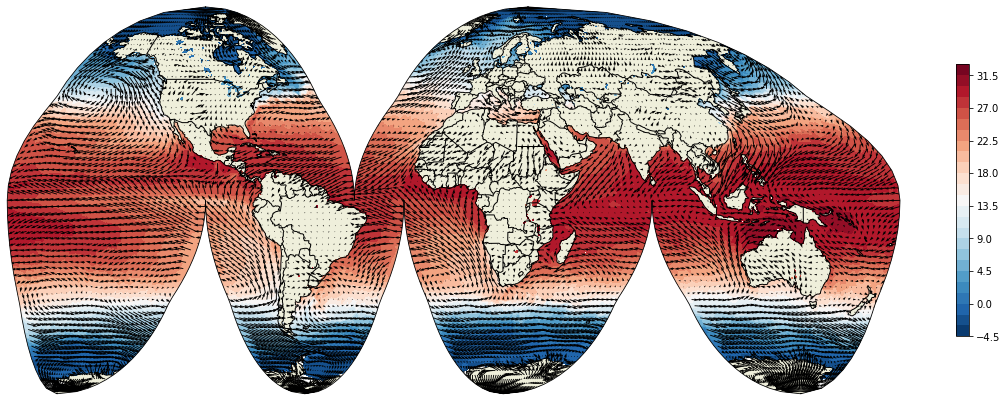

In [6]:
fig=plt.figure(figsize=(20,10));

ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine(central_longitude=0, globe=None));

im=plt.contourf(lon,lat,sst, 
                   transform=ccrs.PlateCarree(), 
                   levels=30,
                   cmap='RdBu_r');

plt.colorbar(im, shrink=0.5)

N=10; 
ax.quiver(lon[::N], lat[::N], u[::N,::N], v[::N,::N],
          transform=ccrs.PlateCarree(),
          #regrid_shape=50,
          width=0.001, 
          scale=500);

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)

plt.savefig('SST_Winds.png')